In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import warnings
warnings.filterwarnings('ignore')



In [21]:
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [22]:
df.head(4)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0


In [23]:
df.size

750

In [24]:
df.shape

(150, 5)

In [25]:
df.tail(20)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
130,7.4,2.8,6.1,1.9,2
131,7.9,3.8,6.4,2.0,2
132,6.4,2.8,5.6,2.2,2
133,6.3,2.8,5.1,1.5,2
134,6.1,2.6,5.6,1.4,2
135,7.7,3.0,6.1,2.3,2
136,6.3,3.4,5.6,2.4,2
137,6.4,3.1,5.5,1.8,2
138,6.0,3.0,4.8,1.8,2
139,6.9,3.1,5.4,2.1,2


In [26]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [28]:
x=df.drop(columns=['target'],axis=1)

In [29]:
x

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [30]:
from sklearn.preprocessing import StandardScaler

In [31]:
scaler_data=StandardScaler().fit_transform(x)

In [32]:
scaler_data

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [33]:
inertia=[]
k_range=range(1,11)
for k in k_range:
    kmeans=KMeans(n_clusters=k,random_state=42)
    kmeans.fit(df)
    inertia.append(kmeans.inertia_)

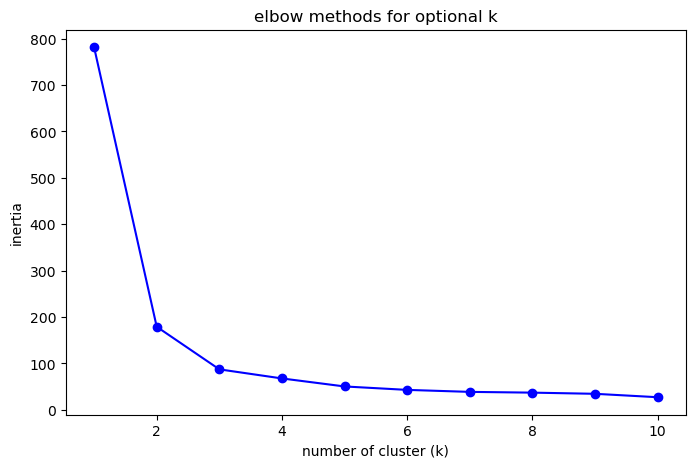

In [34]:
plt.figure(figsize=(8,5))
plt.plot(k_range,inertia,'bo-')
plt.xlabel('number of cluster (k)')
plt.ylabel("inertia")
plt.title("elbow methods for optional k")
plt.grid(False)
plt.show()

In [35]:
inertia

[781.3706000000001,
 179.05358288770051,
 87.2646,
 67.66291891891892,
 50.40672447447448,
 43.00052966927968,
 38.71035454850673,
 37.07746912688089,
 34.560349704429164,
 27.201384216882786]

In [36]:
kmeans=KMeans(n_clusters=4,random_state=42)
df['Cluster']=kmeans.fit_predict(df)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,Cluster
0,5.1,3.5,1.4,0.2,0,1
1,4.9,3.0,1.4,0.2,0,1
2,4.7,3.2,1.3,0.2,0,1
3,4.6,3.1,1.5,0.2,0,1
4,5.0,3.6,1.4,0.2,0,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,3
146,6.3,2.5,5.0,1.9,2,0
147,6.5,3.0,5.2,2.0,2,3
148,6.2,3.4,5.4,2.3,2,3


In [37]:
df['Cluster']

0      1
1      1
2      1
3      1
4      1
      ..
145    3
146    0
147    3
148    3
149    0
Name: Cluster, Length: 150, dtype: int32

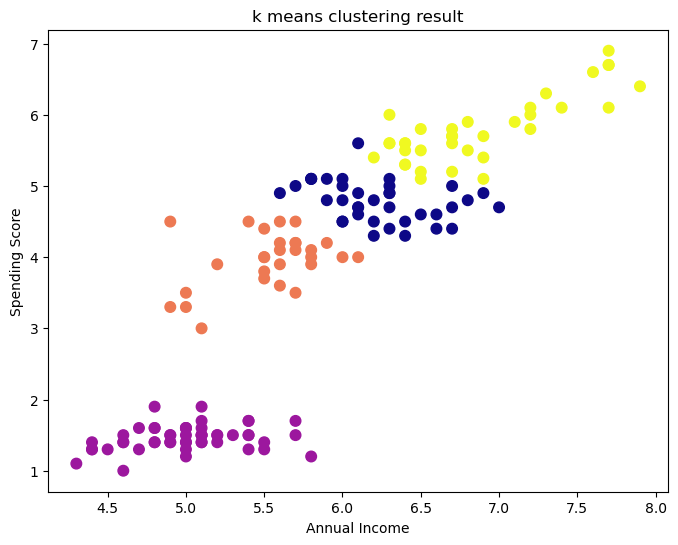

In [38]:
plt.figure(figsize=(8,6))
plt.scatter(df['sepal length (cm)'],df['petal length (cm)'],c=df['Cluster'],cmap='plasma',s=58)
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.title("k means clustering result")
plt.show()

In [39]:
from sklearn.metrics import silhouette_score

In [44]:
score=silhouette_score(x,df["Cluster"])
print(f"Silhouette Score:{score:.3f}")

Silhouette Score:0.494


In [45]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage


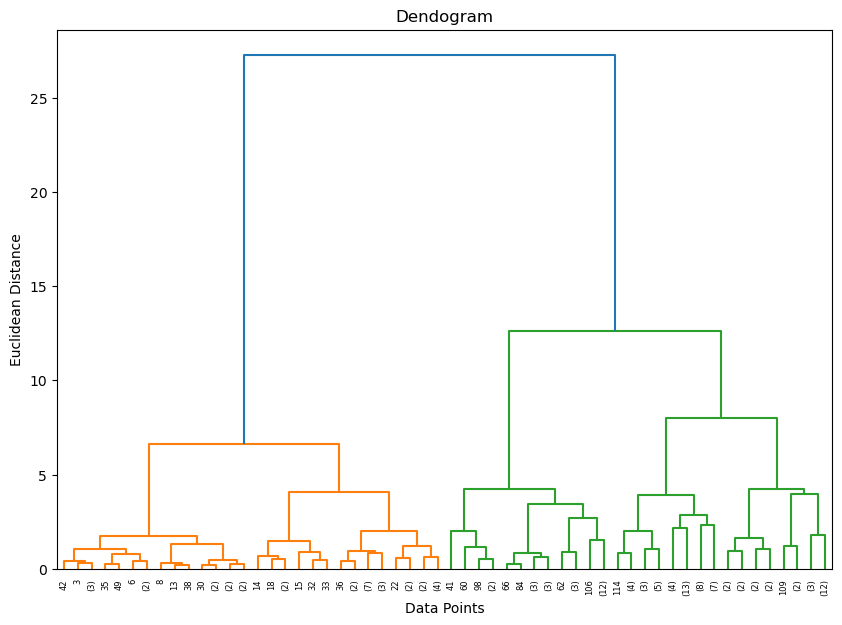

In [47]:
linked = linkage(scaler_data, method='ward') 

plt.figure(figsize=(10,7))

dendrogram(linked,truncate_mode='level',p=5)
plt.title("Dendogram")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

In [48]:
model = AgglomerativeClustering(n_clusters=4, metric='euclidean', linkage='ward')
y_agg = model.fit_predict(scaler_data)
y_agg

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 3, 3, 3, 2, 3, 2, 3, 2, 3, 2, 2, 3, 2, 3, 2, 3,
       2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 3, 2, 3, 3, 2,
       2, 2, 2, 3, 2, 2, 2, 2, 2, 3, 2, 2, 1, 3, 1, 3, 3, 1, 2, 1, 3, 1,
       1, 3, 1, 3, 3, 1, 3, 1, 1, 2, 1, 3, 1, 3, 1, 1, 3, 3, 3, 1, 1, 1,
       3, 3, 3, 1, 1, 3, 3, 1, 1, 1, 3, 1, 1, 1, 3, 3, 1, 3])

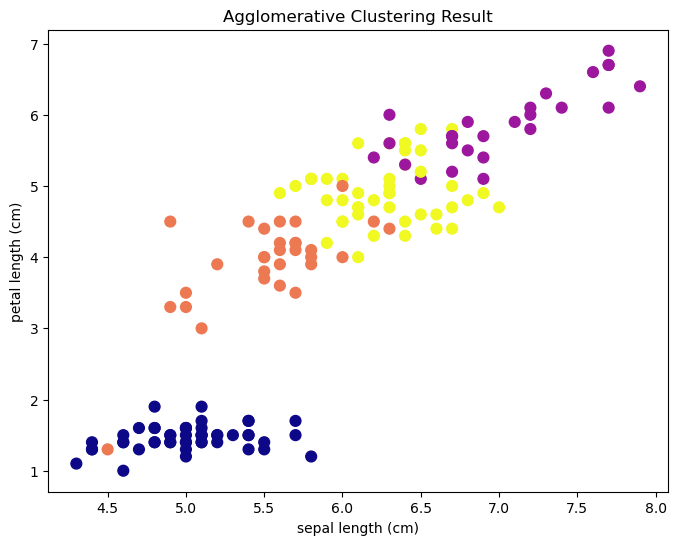

In [51]:
plt.figure(figsize=(8, 6))
plt.scatter(x['sepal length (cm)'], x['petal length (cm)'], c=y_agg, cmap='plasma', s=60)
plt.xlabel('sepal length (cm)')
plt.ylabel('petal length (cm)')
plt.title('Agglomerative Clustering Result')
plt.grid=True
plt.show()